In [1]:
import abc
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from einops import repeat, rearrange
tf.config.experimental.set_visible_devices([], 'GPU')

# uncomment this to enable jax gpu preallocation, might lead to memory issues

import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

# Gecko

In [2]:
from jax_nca.dataset import ImageDataset

In [3]:
dataset = ImageDataset(emoji='🦎', img_size=64)

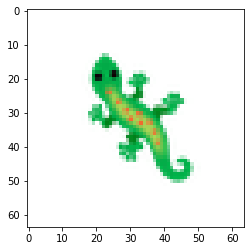

In [4]:
dataset.visualize()

In [5]:
from jax_nca.nca import NCA

### NCA
- num_hidden_channels = 16
- num_target_channels = 3
- cell_fire_rate = 1.0 (100% chance for cells to be updated)
- alpha_living_threshold = 0.1 (threshold for cells to be alive)

In [6]:
nca = NCA(16, 3, trainable_perception=False, cell_fire_rate=1.0, alpha_living_threshold=0.1)

In [7]:
from jax_nca.trainer import EmojiTrainer

In [8]:
trainer = EmojiTrainer(dataset, nca, n_damage=0)

In [9]:
# state = trainer.train(100000, batch_size=8, seed=10, lr=2e-4, min_steps=64, max_steps=96)

#### Get current state from trainer

In [10]:
state = trainer.state

In [11]:
params = nca.load("gecco_100_cell_fire_rate")

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib ipympl

plt.style.use('ggplot')
# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
from celluloid import Camera
from IPython.display import HTML
import jax
import jax.numpy as jnp

def render_nca_steps(nca, params, shape = (64, 64), num_steps = 2):
    nca_seed = nca.create_seed(nca.num_hidden_channels, nca.num_target_channels, shape=shape, batch_size=1)
    rng = jax.random.PRNGKey(0)
    _, outputs = nca.multi_step(params, nca_seed, rng, num_steps=num_steps)
    stacked = jnp.squeeze(jnp.stack(outputs))
    rgbs = np.array(nca.to_rgb(stacked))

    fig = plt.figure("Animation",figsize=(7,5))
    camera = Camera(fig)
    ax = fig.add_subplot(111)
    frames = []
    for r in rgbs:
        frame = ax.imshow(r)
        ax.axis('off')
        camera.snap()
        frames.append([frame])
    animation = camera.animate(blit=False, interval=50)
    animation.save('gecko.mp4')
    return animation, outputs, rgbs

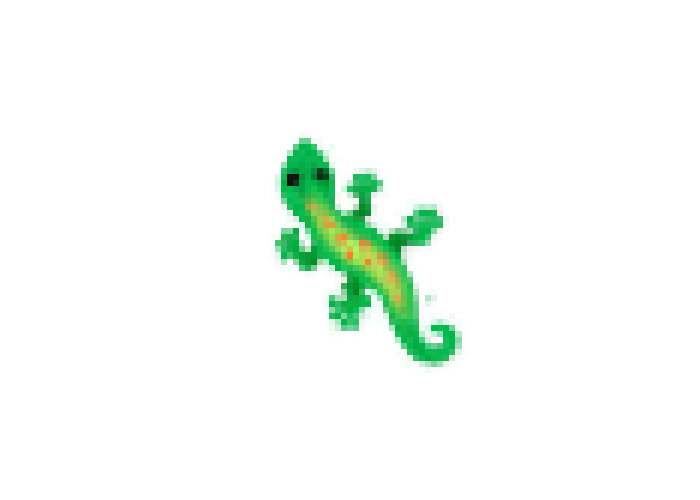

In [13]:
animation, outputs, rgbs = render_nca_steps(nca, params, num_steps=256)

In [14]:
from IPython.display import Video

Video("gecko.mp4")